# Unified Geophysical Workflow with Auto-Detection

This notebook demonstrates **automatic workflow detection** using `BaseAgent.run_unified_agent_workflow()`.

## Supported Workflows

1. **Standard ERT** - ERT data → resistivity → water content
2. **Time-Lapse ERT** - Multiple timesteps with climate integration  
3. **Data Fusion** - Seismic + ERT with structure constraints

## How It Works

```python
# 1. Describe your workflow in natural language
user_request = "Run ERT inversion on data.ohm with lambda=20..."

# 2. System automatically detects workflow type and executes
config = context_agent.parse_request(user_request)
results, plan, interpretation, files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# 3. Done! Get results, execution plan, interpretation, and report files
```

## Key Features

✅ **Auto-Detection**: Infers workflow type from your natural language description  
✅ **One Call**: Complete workflow execution in a single method  
✅ **Natural Language**: Just describe what you want to do  
✅ **Integrated**: Uses existing BaseAgent + DataFusionAgent logic  

---

## 1. Setup and Imports

Run the cells below to see automatic workflow detection in action!


In [1]:
import os
import sys
from pathlib import Path

# Import core agents - BaseAgent has the unified workflow logic built-in!
from PyHydroGeophysX.agents import (
    BaseAgent,
    ContextInputAgent
)

# Setup default output directory
default_output_dir = Path('results/unified_workflow')
default_output_dir.mkdir(parents=True, exist_ok=True)

print("✓ All packages imported successfully")
print("✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection")
print(f"✓ Output directory: {default_output_dir}")


API path =  c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\resipy
ResIPy version =  3.6.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.
✓ All packages imported successfully
✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection
✓ Output directory: results\unified_workflow


## 2. Configure API Key

Set your OpenAI API key here:


In [ ]:
# Set API key directly (or it will try to get from environment)


# Configure API
llm_provider = 'openai'  # Options: 'openai', 'gemini', 'claude'
llm_model = 'gpt-4o-mini'
api_key = os.getenv('OPENAI_API_KEY')

if not api_key:
    print("⚠️  Warning: API key not found")
else:
    print(f"✓ Using {llm_provider} with model {llm_model}")

# Initialize context agent for natural language parsing
context_agent = ContextInputAgent(api_key=api_key, model=llm_model, llm_provider=llm_provider)

print("✓ System ready - using BaseAgent.run_unified_agent_workflow()")
print("✓ Workflow type will be automatically detected from your request!")


✓ Using openai with model gpt-4o-mini
✓ System ready - using BaseAgent.run_unified_agent_workflow()
✓ Workflow type will be automatically detected from your request!


## 3. Example: Automatic Workflow Detection

The system analyzes your natural language request and automatically determines which workflow type to use:
- **Standard ERT**: Single ERT file → inversion → water content
- **Time-Lapse**: Multiple ERT files → temporal inversion → climate integration
- **Data Fusion**: Seismic + ERT → structure-constrained inversion → water content


USER REQUEST:
We have ERT data from DAS-1 instrument at examples/data/ERT/DAS/20171105_1418.Data 
and electrode file in examples/data/ERT/DAS/electrodes.dat 
in the Snowy Range in southeastern Wyoming. The bedrock consists of foliated gneiss in the Cheyenne Belt. 
Use specific petrophysical parameters: rho_sat = 541, porosity = 0.37, n = 1.24

🤖 Parsing request...
Parsing request with multi-stage extraction:
  Stage 1: Extracting ERT inversion configuration...
  Stage 2: Extracting data fusion configuration...
  Stage 3: Extracting climate/site configuration...
  ⚠️  LLM did not extract electrode file. Using regex fallback: examples/data/ERT/DAS/electrodes.dat
✓ Multi-stage extraction complete
✓ Configuration generated

[DEBUG] Config keys: ['data_file', 'project_dir', 'instrument', 'crs', 'inversion_mode', 'inversion_params', 'petrophysical_parameters', 'fusion_pattern', 'methods', 'ert_file', 'ert_params', 'n_realizations', 'layer_params', 'output_dir', 'coverage_threshold', 'use_cli

12/11/25 - 17:23:40 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (2.4s x 3): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\5083329052317016331
12/11/25 - 17:23:40 - pyGIMLi - INFO - Found 2 regions.
12/11/25 - 17:23:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/11/25 - 17:23:40 - pyGIMLi - INFO - Found 2 regions.
12/11/25 - 17:23:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/11/25 - 17:23:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/11/25 - 17:23:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


[ert_loader] [INFO] ERT data loading completed successfully
[ert_inversion] [INFO] Starting standard ERT inversion
[ert_inversion] [INFO] Exporting data to inversion format
   Exported data with k=1 to results\unified_workflow\example_1\inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 27 measurements with extreme apparent resistivity
   Final dataset: 930 measurements with computed K
   Saved data with computed K to results\unified_workflow\example_1\inversion\bert_data.dat
[ert_inversion] [INFO] ERT data exported to: results\unified_workflow\example_1\inversion\bert_data.dat
[ert_inversion] [INFO] Inversion parameters: lambda=15, max_iter=10, method=cgls
[ert_inversion] [INFO] Running ERT inversion...


12/11/25 - 17:23:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3632 Cells: 6940 Boundaries: 5366


-------------------Iteration: 0 ---------------------------
chi2: [[120.32985315]]
dPhi: 1.0


C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\solvers\linear_solvers.py:212: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(gamma / xp.dot(q.T, q))
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\solvers\linear_solvers.py:229: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma_new = float(xp.dot(s.T, s))
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\solvers\linear_solvers.py:230: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fu

-------------------Iteration: 1 ---------------------------
chi2: [[15.45425626]]
dPhi: [[0.87156756]]
-------------------Iteration: 2 ---------------------------
chi2: [[6.01551485]]
dPhi: [[0.61075352]]
-------------------Iteration: 3 ---------------------------
chi2: [[2.7629517]]
dPhi: [[0.54069572]]
-------------------Iteration: 4 ---------------------------
chi2: [[1.21618066]]
dPhi: [[0.55982558]]
End of inversion
[ert_inversion] [INFO] Inversion completed successfully
[ert_inversion] [INFO] Generating interpretation of results


C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\agents\ert_inversion_agent.py:265: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_chi2 = float(inversion_result.iteration_chi2[-1]) if inversion_result.iteration_chi2 else 0.0
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\agents\ert_inversion_agent.py:145: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'chi2': float(inversion_result.iteration_chi2[-1]) if inversion_result.iteration_chi2 else None,
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\ag

[ert_inversion] [INFO] Final chi2: 1.216, Iterations: 5
Evaluating inversion quality...
[inversion_evaluation] Starting inversion quality evaluation
[inversion_evaluation] Initial quality score: 50.0/100
[inversion_evaluation] Attempt 2/5: Adjusting parameters
[inversion_evaluation] Fine-tuning: adjusting lambda to 24.00
[inversion_evaluation] Adjusted lambda: 20 → 24.0
[ert_inversion] [INFO] Starting standard ERT inversion
[ert_inversion] [INFO] Exporting data to inversion format
   Exported data with k=1 to results\ert_inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 27 measurements with extreme apparent resistivity
   Final dataset: 930 measurements with computed K
   Saved data with computed K to results\ert_inversion\bert_data.dat
[ert_inversion] [INFO] ERT data exported to: results\ert_inversion\bert_data.dat
[ert_inversion] [INFO] Inversion parameters: lambda=24.0, max_iter=10, method=cgls
[ert_inversion] [INFO] Running ERT inversion...
------

12/11/25 - 17:24:14 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (2.4s x 5): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\5083329052317016331
12/11/25 - 17:24:14 - pyGIMLi - INFO - Found 2 regions.
12/11/25 - 17:24:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/11/25 - 17:24:14 - pyGIMLi - INFO - Found 2 regions.
12/11/25 - 17:24:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/11/25 - 17:24:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/11/25 - 17:24:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/11/25 - 17:24:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3632 Cells: 6940 Boundaries: 5366


[ert_inversion] [INFO] Final chi2: 0.627, Iterations: 5
[inversion_evaluation] New quality score: 50.0/100
[inversion_evaluation] Attempt 3/5: Adjusting parameters
[inversion_evaluation] Fine-tuning: adjusting lambda to 28.80
[inversion_evaluation] Adjusted lambda: 24.0 → 28.799999999999997
[ert_inversion] [INFO] Starting standard ERT inversion
[ert_inversion] [INFO] Exporting data to inversion format
   Exported data with k=1 to results\ert_inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 27 measurements with extreme apparent resistivity
   Final dataset: 930 measurements with computed K
   Saved data with computed K to results\ert_inversion\bert_data.dat
[ert_inversion] [INFO] ERT data exported to: results\ert_inversion\bert_data.dat
[ert_inversion] [INFO] Inversion parameters: lambda=28.799999999999997, max_iter=10, method=cgls
[ert_inversion] [INFO] Running ERT inversion...
-------------------Iteration: 0 ---------------------------
chi2: [[120.3

Monte Carlo Simulations: 100%|██████████| 100/100 [00:04<00:00, 24.60it/s]


[water_content] [INFO] Monte Carlo analysis completed
[water_content] [INFO] Generating interpretation of water content results
[water_content] [INFO] Mean water content: 0.166
[report_generator] [INFO] Starting report generation
[report_generator] [INFO] Generating report sections


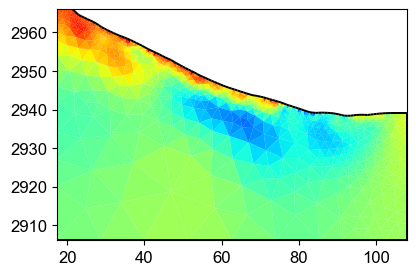

[report_generator] [INFO] Saved resistivity model plot
[report_generator] [INFO] Saved water content plot
[report_generator] [INFO] Saved water content uncertainty plot
[report_generator] [INFO] Generating narrative report with LLM
[report_generator] [INFO] Report saved to results\unified_workflow\example_1\workflow_report.md
[report_generator] [INFO] PDF report saved to results\unified_workflow\example_1\workflow_report.pdf

WORKFLOW RESULTS

✅ Workflow completed successfully!
📄 Generated 3 report files

💡 TIP: Change the user_request to try different workflows:
  - Time-lapse: 'I have 5 time-lapse files: file1.ohm, file2.ohm...'
  - Data fusion: 'Use seismic at 1000 m/s to constrain ERT inversion...'


<Figure size 640x480 with 0 Axes>

In [3]:
# Example: Automatic Workflow Detection and Execution
# The system infers workflow type from your natural language request!

user_request = """We have ERT data from DAS-1 instrument at examples/data/ERT/DAS/20171105_1418.Data 
and electrode file in examples/data/ERT/DAS/electrodes.dat 
in the Snowy Range in southeastern Wyoming. The bedrock consists of foliated gneiss in the Cheyenne Belt. 
Use specific petrophysical parameters: rho_sat = 541, porosity = 0.37, n = 1.24"""

print("="*70)
print("USER REQUEST:")
print(user_request)
print("="*70)

# Parse natural language request
print("\n🤖 Parsing request...")
config = context_agent.parse_request(user_request)
print("✓ Configuration generated")

# Debug: Print config to see what was extracted
print(f"\n[DEBUG] Config keys: {list(config.keys())}")
print(f"\n[DEBUG] Full config:")
import json
print(json.dumps(config, indent=2, default=str))

# Check for ERT file
if 'ert_file' in config:
    print(f"\n[DEBUG] ert_file: {config['ert_file']}")
else:
    print("\n⚠️ WARNING: 'ert_file' not found in config!")
    print("Looking for alternative keys...")
    for key in ['data_file', 'file', 'ert_data_file']:
        if key in config:
            print(f"  Found '{key}': {config[key]}")
            # Fix: use data_file as ert_file
            config['ert_file'] = config[key]
            break

# Check for electrode file (ContextInputAgent now extracts this automatically)
if 'electrode_file' in config:
    print(f"\n[DEBUG] electrode_file: {config['electrode_file']}")
else:
    print("\n⚠️ WARNING: 'electrode_file' not found in config (topography will not be used)")

# Run unified workflow - automatically detects type and executes!
print("\n🚀 Running unified workflow (auto-detecting type)...")
output_dir = default_output_dir / 'example_1'
results, execution_plan, interpretation, report_files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# Display results
print("\n" + "="*70)
print("WORKFLOW RESULTS")
print("="*70)
if interpretation:
    print(f"\n💡 Interpretation:\n{interpretation}")
    
if execution_plan:
    print(f"\n📋 Execution Plan ({len(execution_plan)} steps):")
    for i, step in enumerate(execution_plan, 1):
        print(f"  {i}. {step['step']} → {step['agent']}")

if results.get('status') == 'success':
    print("\n✅ Workflow completed successfully!")
    if report_files:
        print(f"📄 Generated {len(report_files)} report files")
else:
    print(f"\n❌ Workflow failed: {results.get('error')}")

print("\n💡 TIP: Change the user_request to try different workflows:")
print("  - Time-lapse: 'I have 5 time-lapse files: file1.ohm, file2.ohm...'")
print("  - Data fusion: 'Use seismic at 1000 m/s to constrain ERT inversion...'")
print("="*70)


## Summary

This notebook demonstrates the unified geophysical workflow interface:

- **Single Entry Point**: Just describe what you want in natural language
- **Auto-Detection**: WorkflowOrchestratorAgent determines the workflow type
- **Intelligent Routing**: Automatically uses the right agents for the task
- **Three Workflow Types**: Standard ERT, Time-Lapse, and Data Fusion

### For Data Fusion Workflows:

The `DataFusionAgent.execute_full_workflow()` method handles everything internally:
- Loads seismic and ERT data
- Runs seismic inversion (via SeismicAgent)
- Extracts velocity interface
- Runs structure-constrained ERT (via StructureConstraintAgent)
- Optionally converts to water content (via PetrophysicsAgent)

All operations are encapsulated - no need to manage individual agents!

### Next: Try the Streamlit Web App!

For an even easier interface, check out `app_geophysics_workflow.py` - a web UI where you can:
- Input natural language descriptions
- Upload data files
- Get results and reports automatically

Run with: `streamlit run app_geophysics_workflow.py`
